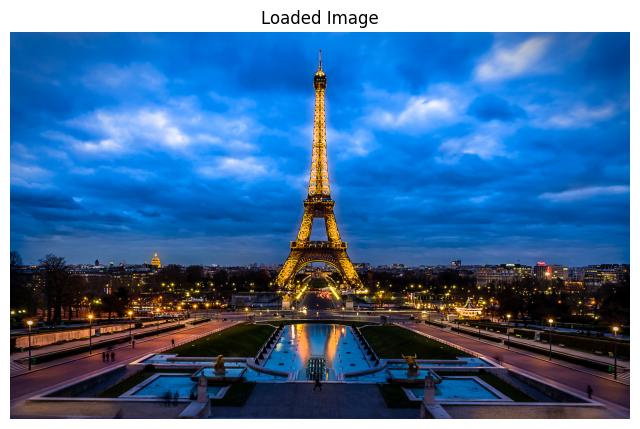

In [5]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def load_image_local(file_path):
    # Load image using PIL and convert to numpy array
    image_raw = np.array(Image.open(file_path).convert('RGB'))
    return image_raw

def display_image(image_raw):
    plt.figure(figsize=(8, 8))
    plt.imshow(image_raw)
    plt.title('Loaded Image')
    plt.axis('off')  # Hide axes
    plt.show()

# Local file path
file_path = r'D:\6m_NIC\images\eiffiel.jpg'
image_raw = load_image_local(file_path)
display_image(image_raw)

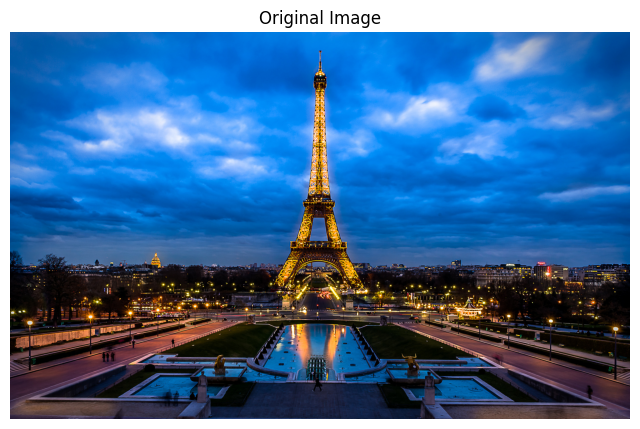

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image(file_path):
    # Load image using PIL and convert to numpy array
    image_raw = np.array(Image.open(file_path).convert('RGB'))
    return image_raw

def display_image(image_raw, title='Image'):
    plt.figure(figsize=(8, 8))
    # Display grayscale images in grayscale and color images in RGB
    plt.imshow(image_raw, cmap='gray' if len(image_raw.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Local file path
file_path = r'D:\6m_NIC\images\eiffiel.jpg'
image_raw = load_image(file_path)
display_image(image_raw, 'Original Image')


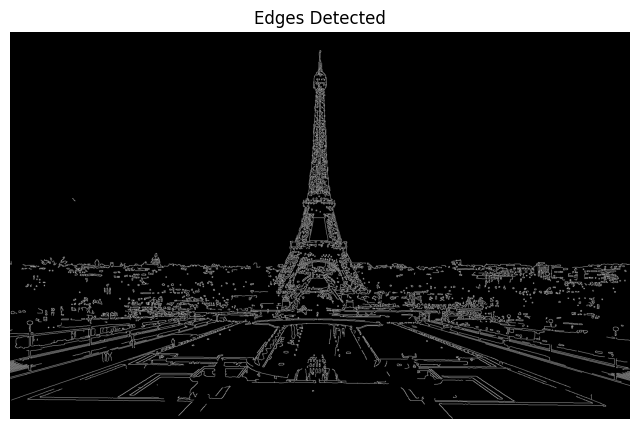

In [8]:
def edge_detection(image_raw):
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image_raw, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, 100, 200)
    return edges

# Perform edge detection
edges = edge_detection(image_raw)

# Display the edges
display_image(edges, 'Edges Detected')


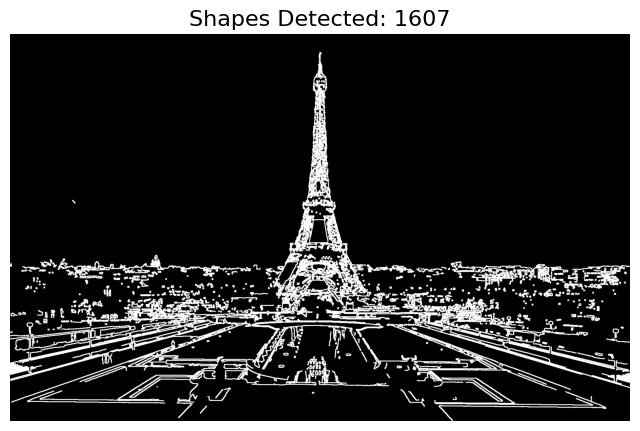

Total number of shapes detected: 1607
Shape 1:
  - Number of points in contour: 18
  - Number of vertices in approximation: 2
Shape 2:
  - Number of points in contour: 116
  - Number of vertices in approximation: 4
Shape 3:
  - Number of points in contour: 12
  - Number of vertices in approximation: 2
Shape 4:
  - Number of points in contour: 58
  - Number of vertices in approximation: 2
Shape 5:
  - Number of points in contour: 48
  - Number of vertices in approximation: 2
Shape 6:
  - Number of points in contour: 56
  - Number of vertices in approximation: 6
Shape 7:
  - Number of points in contour: 10
  - Number of vertices in approximation: 2
Shape 8:
  - Number of points in contour: 51
  - Number of vertices in approximation: 2
Shape 9:
  - Number of points in contour: 74
  - Number of vertices in approximation: 2
Shape 10:
  - Number of points in contour: 17
  - Number of vertices in approximation: 10
Shape 11:
  - Number of points in contour: 58
  - Number of vertices in approxi

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_shapes(edges):
    # Find contours from the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image to draw contours
    image_with_shapes = np.zeros_like(edges)  # Same size as edges but all black

    # Draw contours on the blank image
    cv2.drawContours(image_with_shapes, contours, -1, (255, 255, 255), 2)  # White contours

    return contours, image_with_shapes

# Example usage:
# Assuming 'edges' is the result from edge detection
contours, image_with_shapes = find_shapes(edges)

# Count the number of shapes
num_shapes = len(contours)

# Display the image with shapes and the total number of shapes
plt.figure(figsize=(8, 8))
plt.imshow(image_with_shapes, cmap='gray')
plt.title(f'Shapes Detected: {num_shapes}', fontsize=16)
plt.axis('off')  # Hide axes
plt.show()

# Print information about the contours
print(f'Total number of shapes detected: {num_shapes}')
for i, contour in enumerate(contours):
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Print shape information
    print(f'Shape {i+1}:')
    print(f'  - Number of points in contour: {len(contour)}')
    print(f'  - Number of vertices in approximation: {len(approx)}')


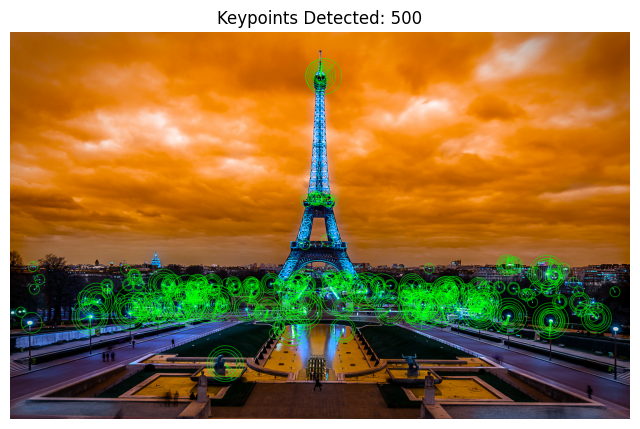

Total number of keypoints detected: 500


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_keypoints(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create ORB detector object
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return keypoints, image_with_keypoints

def display_image(image, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage:
# Assuming 'image_raw' is the image loaded earlier
keypoints, image_with_keypoints = detect_keypoints(image_raw)

# Display the image with detected keypoints
display_image(image_with_keypoints, f'Keypoints Detected: {len(keypoints)}')

# Print the number of keypoints detected
print(f'Total number of keypoints detected: {len(keypoints)}')


Raw Image info: (1200, 1920, 3)
Raw Image datatype: uint8
Image shape (numpy array): (1200, 1200)
      ┌────────────┐
 q_0: ┤ Ry(3.1411) ├
      ├────────────┤
 q_1: ┤ Ry(3.1411) ├
      ├────────────┤
 q_2: ┤ Ry(3.1411) ├
      ├────────────┤
 q_3: ┤ Ry(3.1412) ├
      ├────────────┤
 q_4: ┤ Ry(3.1412) ├
      ├────────────┤
 q_5: ┤ Ry(3.1411) ├
      ├────────────┤
 q_6: ┤ Ry(3.1411) ├
      ├────────────┤
 q_7: ┤ Ry(3.1411) ├
      ├────────────┤
 q_8: ┤ Ry(3.1411) ├
      ├────────────┤
 q_9: ┤ Ry(3.1411) ├
      ├────────────┤
q_10: ┤ Ry(3.1411) ├
      ├───────────┬┘
q_11: ┤ Ry(3.141) ├─
      ├───────────┤ 
q_12: ┤ Ry(3.141) ├─
      ├───────────┴┐
q_13: ┤ Ry(3.1411) ├
      ├────────────┤
q_14: ┤ Ry(3.1411) ├
      ├────────────┤
q_15: ┤ Ry(3.1411) ├
      ├────────────┤
q_16: ┤ Ry(3.1412) ├
      ├────────────┤
q_17: ┤ Ry(3.1412) ├
      ├────────────┤
q_18: ┤ Ry(3.1412) ├
      ├────────────┤
q_19: ┤ Ry(3.1411) ├
      └────────────┘
State Vector: Statevector([4.44519320e-73

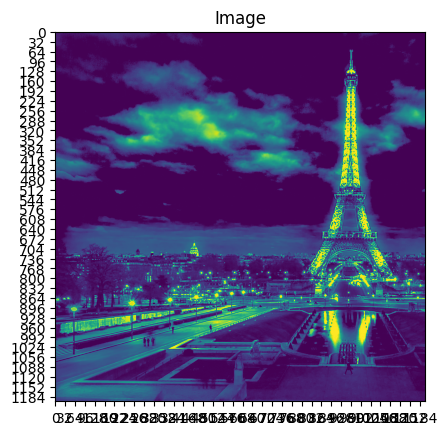

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import RYGate

# Load and preprocess the image
image_raw = np.array(Image.open( r'D:\6m_NIC\images\eiffiel.jpg'))
image_size_x, image_size_y = image_raw.shape[0], image_raw.shape[1]
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Convert the RGB component of the image to B&W image, as a numpy (float32) array
image = []
for i in range(image_crop_size):
    image.append([])
    for j in range(image_crop_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)

# Flatten the image array
flattened_image = image.flatten()

def encode_image_into_quantum_state(image_data):
    num_pixels = image_data.size
    num_qubits = int(np.log2(num_pixels))
    
    # Create a quantum circuit with the necessary number of qubits
    qc = QuantumCircuit(num_qubits)
    
    # Prepare the quantum state with amplitude encoding
    norm_factor = np.linalg.norm(image_data)
    image_data_normalized = image_data / norm_factor
    
    for i in range(num_qubits):
        if i < len(image_data_normalized):  # Ensure index is within range
            theta = 2 * np.arccos(image_data_normalized[i])
            qc.append(RYGate(theta), [i])
    
    return qc

# Encode the flattened image data into a quantum state
qc = encode_image_into_quantum_state(flattened_image)

# Visualize the quantum circuit
print(qc.draw())

# Use a simulator to execute the quantum circuit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()

# Get the state vector
statevector = result.get_statevector()
print('State Vector:', statevector)

# Display the image
plt.title('Image')
plt.xticks(range(0, image.shape[1]+1, 32))
plt.yticks(range(0, image.shape[0]+1, 32))
plt.imshow(image, cmap='viridis', origin='upper')
plt.show()

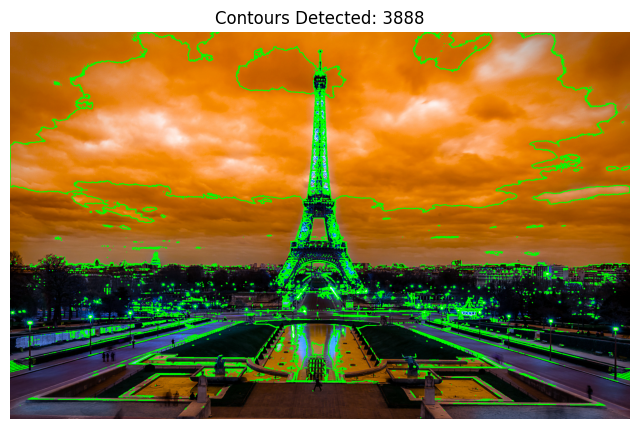

Total number of contours detected: 3888


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_contours(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to get a binary image
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

    return contours, image_with_contours

def display_image(image, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage:
# Assuming 'image_raw' is the image loaded earlier
contours, image_with_contours = find_contours(image_raw)

# Display the image with detected contours
display_image(image_with_contours, f'Contours Detected: {len(contours)}')

# Print the number of contours detected
print(f'Total number of contours detected: {len(contours)}')


Raw Image info: (1200, 1920, 3)
Raw Image datatype: uint8


<Figure size 1400x700 with 0 Axes>

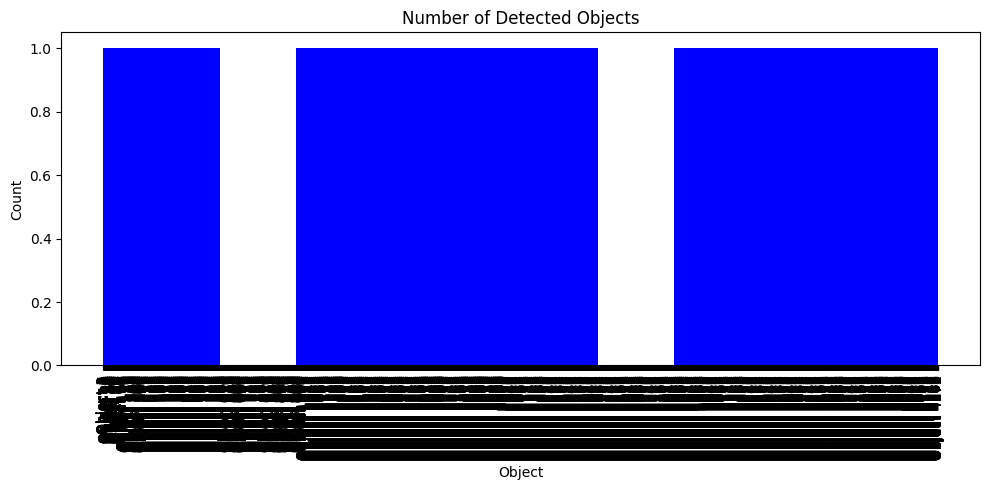

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_raw = np.array(Image.open( r'D:\6m_NIC\images\eiffiel.jpg'))
image_size_x, image_size_y = image_raw.shape[0], image_raw.shape[1]
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Convert the RGB component of the image to grayscale
image_gray = cv2.cvtColor(image_raw, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(image_gray, 100, 200)

# Convert the edges to a binary image
_, binary_image = cv2.threshold(edges, 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and label objects
image_with_labels = image_raw.copy()
object_names = ["Object {}".format(i + 1) for i in range(len(contours))]  # Placeholder names
for i, contour in enumerate(contours):
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Draw contour
    cv2.drawContours(image_with_labels, [approx], -1, (0, 255, 0), 2)  # Draw in green
    
    # Compute the center of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    # Put text label
    label = object_names[i]
    cv2.putText(image_with_labels, label, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot bar chart of detected objects
plt.figure(figsize=(10, 5))
plt.bar(range(len(object_names)), [1] * len(object_names), tick_label=object_names, color='blue')
plt.xlabel('Object')
plt.ylabel('Count')
plt.title('Number of Detected Objects')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Raw Image info: (1200, 1920, 3)
Raw Image datatype: uint8


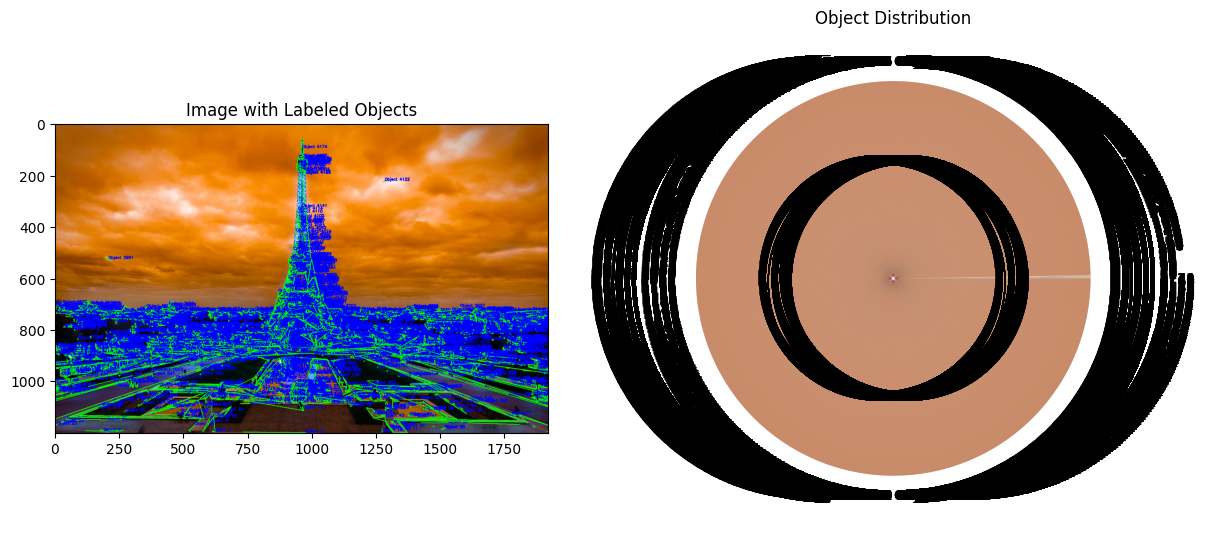

Number of Objects: 4174


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_raw = np.array(Image.open( r'D:\6m_NIC\images\eiffiel.jpg'))
image_size_x, image_size_y = image_raw.shape[0], image_raw.shape[1]
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Convert the RGB component of the image to grayscale
image_gray = cv2.cvtColor(image_raw, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(image_gray, 100, 200)

# Convert the edges to a binary image
_, binary_image = cv2.threshold(edges, 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and label objects
image_with_labels = image_raw.copy()
object_names = ["Object {}".format(i + 1) for i in range(len(contours))]  # Placeholder names

for i, contour in enumerate(contours):
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Draw contour
    cv2.drawContours(image_with_labels, [approx], -1, (0, 255, 0), 2)  # Draw in green
    
    # Compute the center of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    # Put text label
    label = object_names[i]
    cv2.putText(image_with_labels, label, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot the image with labeled objects
plt.subplot(1, 2, 1)
plt.title('Image with Labeled Objects')
plt.imshow(cv2.cvtColor(image_with_labels, cv2.COLOR_BGR2RGB))
plt.axis('on')

# Plot pie chart of detected objects
plt.subplot(1, 2, 2)
sizes = [1] * len(object_names)  # All sizes are equal since each object is counted once
colors = plt.cm.Paired(np.arange(len(object_names)))
plt.pie(sizes, labels=object_names, autopct='%1.1f%%', colors=colors)
plt.title('Object Distribution')

plt.show()

print('Number of Objects:', len(contours))